Se toma una lata de gaseosa, cerveza o de cualquier líquido (de forma tal que la relación entre el tamaño de la lata y el del recinto sea lo más pequeña posible) y se enfría hasta una temperatura TL considerablemente inferior a la temperatura ambiente de un recinto, TR=18<sup>o</sup>C. Se ubica la lata en el recinto y se mide la temperatura del recinto y de la lata. Se realizan mediciones periódicas (igualmente espaciadas en el tiempo) de la temperatura de la lata. 

Se define un intervalo de tiempo entre observaciones a utilizar para obtener los datos base para la construcción del modelo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
datos=np.array([4.5,4.9,5.1,5.3,5.5,5.6,5.7,5.9,6.1,6.2,6.4,6.6,6.7,6.9,7.0,7.2,7.3,7.5,7.6,7.8,7.9])
len(datos)

21

In [4]:
TA=18.0
n=np.linspace(1,len(datos),len(datos))
print(n)
X_n=TA-datos
print(X_n)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21.]
[13.5 13.1 12.9 12.7 12.5 12.4 12.3 12.1 11.9 11.8 11.6 11.4 11.3 11.1
 11.  10.8 10.7 10.5 10.4 10.2 10.1]


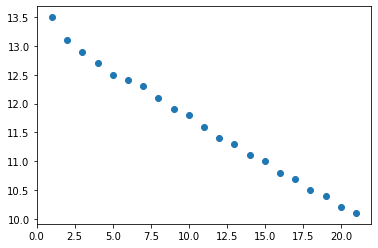

In [5]:
%matplotlib inline
plt.scatter(n,X_n)

In [6]:
datosT=pd.DataFrame({"temp":datos})
datosT.head()

,temp
0,4.5
1,4.9
2,5.1
3,5.3
4,5.5


Variable de estado
$$ X_n=TA-T_{lata_n}=X_{n-1}+k*X_{n-1}=(1+k)X_{n-1} $$
$$ X_n=X_{n-1}+\Delta_{X_{n-1}} $$
$$ \Delta_{X_{n-1}}=X_n-X_{n-1}$$
$$ \Delta_{X_{n-1}}=k*X_{n-1}$$

In [7]:
datosT["xn"]=TA-datosT.temp
datosT.head()

,temp,xn
0,4.5,13.5
1,4.9,13.1
2,5.1,12.9
3,5.3,12.7
4,5.5,12.5


In [9]:
datosT["delta"]=datosT["xn"].diff()
datosT.head(10)

,temp,xn,delta
0,4.5,13.5,NaN
1,4.9,13.1,-0.4
2,5.1,12.9,-0.2
3,5.3,12.7,-0.2
4,5.5,12.5,-0.2
5,5.6,12.4,-0.1
6,5.7,12.3,-0.1
7,5.9,12.1,-0.2
8,6.1,11.9,-0.2
9,6.2,11.8,-0.1


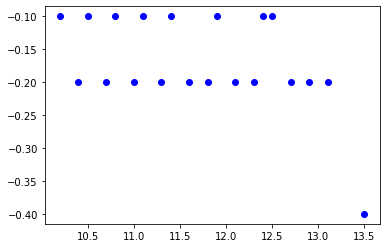

In [11]:
plt.plot(datosT.xn[0:-1],datosT.delta[1:],'bo')

$$ \Delta_{X_{n-1}}=k*X_{n-1}$$
$$ k=\frac{\Delta_{X_{n-1}}}{X_{n-1}}$$

In [13]:
k=datosT.delta[1:].values/datosT.xn[0:-1].values
print(k)

[-0.02962963 -0.01526718 -0.01550388 -0.01574803 -0.008      -0.00806452
 -0.01626016 -0.01652893 -0.00840336 -0.01694915 -0.01724138 -0.00877193
 -0.01769912 -0.00900901 -0.01818182 -0.00925926 -0.01869159 -0.00952381
 -0.01923077 -0.00980392]


In [14]:
k_mean=np.mean(k)
k_mean

-0.014388371532105055

In [34]:
Xn_modelo=np.zeros(len(datosT.xn))
deltaXn_modelo=np.zeros(len(datosT.xn))
Xn_modelo[0]=datosT.xn[0]
deltaXn_modelo[0]=k_mean*Xn_modelo[0]
for i in range(len(Xn_modelo)-1):
    Xn_modelo[i+1]=Xn_modelo[i]+k_mean*Xn_modelo[i]
    deltaXn_modelo[i+1]=k_mean*Xn_modelo[i+1]
datosT["Xn_modelo"]=Xn_modelo
datosT["deltaXn_modelo"]=deltaXn_modelo
datosT["Tem_lata_modelo"]=18-Xn_modelo

In [35]:
datosT.head()

,temp,xn,delta,Xn_modelo,deltaXn_modelo,Tem_lata_modelo,Xn_modelo2,deltaXn_modelo2
0,4.5,13.5,NaN,13.500000,-0.194243,4.500000,13.500000,-0.197894
1,4.9,13.1,-0.4,13.305757,-0.191448,4.694243,13.302106,-0.194993
2,5.1,12.9,-0.2,13.114309,-0.188694,4.885691,13.107114,-0.192134
3,5.3,12.7,-0.2,12.925615,-0.185979,5.074385,12.914979,-0.189318
4,5.5,12.5,-0.2,12.739637,-0.183303,5.260363,12.725662,-0.186543


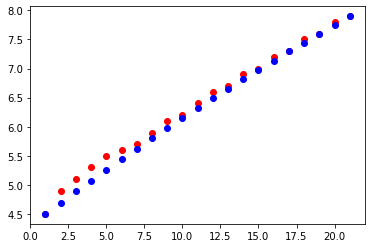

In [36]:
plt.plot(n,datosT["temp"],"ro")
plt.plot(n,datosT["Tem_lata_modelo"],"bo")

Métricas de comparación
$$ SCE=\sum\limits_{n=1}^{N}(X_n-\hat{X}_n)^2 $$

In [48]:
sce1=sum((datosT["temp"]-datosT["Tem_lata_modelo"])**2)
print(sce1)

0.290330392489619


$$ MDA=\max\limits_{n=1,\cdots, N}|X_n-\hat{X}_n| $$

In [49]:
mad1=np.max(np.abs(datosT["temp"]-datosT["Tem_lata_modelo"]))
print(mad1)

0.2396367071077492


Estimación del valor de $k$ a través de la minimización de la SCE

In [50]:
A=np.column_stack((np.array(datosT.xn[0:-1].tolist()),np.zeros(len(datosT.xn[0:-1].tolist()))))

In [51]:
A

array([[13.5,  0. ],
       [13.1,  0. ],
       [12.9,  0. ],
       [12.7,  0. ],
       [12.5,  0. ],
       [12.4,  0. ],
       [12.3,  0. ],
       [12.1,  0. ],
       [11.9,  0. ],
       [11.8,  0. ],
       [11.6,  0. ],
       [11.4,  0. ],
       [11.3,  0. ],
       [11.1,  0. ],
       [11. ,  0. ],
       [10.8,  0. ],
       [10.7,  0. ],
       [10.5,  0. ],
       [10.4,  0. ],
       [10.2,  0. ]])

In [52]:
popt,res,rank,val= np.linalg.lstsq(A,datosT.delta[1:].values,rcond=None)

In [53]:
m,c=popt
print(m,c)

-0.014658782951465877 0.0


In [54]:
Xn_modelo=np.zeros(len(datosT.xn))
deltaXn_modelo=np.zeros(len(datosT.xn))
Xn_modelo[0]=datosT.xn[0]
deltaXn_modelo[0]=m*Xn_modelo[0]
for i in range(len(Xn_modelo)-1):
    Xn_modelo[i+1]=Xn_modelo[i]+m*Xn_modelo[i]
    deltaXn_modelo[i+1]=m*Xn_modelo[i+1]
datosT["Xn_modelo2"]=Xn_modelo
datosT["deltaXn_modelo2"]=deltaXn_modelo
datosT["Tem_lata_modelo2"]=18-Xn_modelo

In [55]:
datosT.head()

,temp,xn,delta,Xn_modelo,deltaXn_modelo,Tem_lata_modelo,Xn_modelo2,deltaXn_modelo2,Tem_lata_modelo2
0,4.5,13.5,NaN,13.500000,-0.194243,4.500000,13.500000,-0.197894,4.500000
1,4.9,13.1,-0.4,13.305757,-0.191448,4.694243,13.302106,-0.194993,4.697894
2,5.1,12.9,-0.2,13.114309,-0.188694,4.885691,13.107114,-0.192134,4.892886
3,5.3,12.7,-0.2,12.925615,-0.185979,5.074385,12.914979,-0.189318,5.085021
4,5.5,12.5,-0.2,12.739637,-0.183303,5.260363,12.725662,-0.186543,5.274338


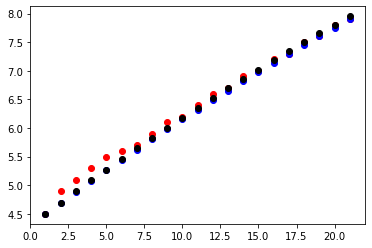

In [56]:
plt.plot(n,datosT["temp"],"ro")
plt.plot(n,datosT["Tem_lata_modelo"],"bo")
plt.plot(n,datosT["Tem_lata_modelo2"],"ko")

In [61]:
sce2=sum((datosT["temp"]-datosT["Tem_lata_modelo2"])**2)
print(sce2)
mad2=np.max(np.abs(datosT["temp"]-datosT["Tem_lata_modelo2"]))
print(mad2)

0.2359225522143977
0.2256615238725903


In [62]:
print(sce1,sce2)
print(mad1,mad2)

0.290330392489619 0.2359225522143977
0.2396367071077492 0.2256615238725903


$$\Delta_{X_{n-1}}=k*X_{n-1}$$
$$ minimizar\ z=\max\limits_{n=1,\cdots,N}\{|\Delta_{X_{n-1}}-\hat{k}*X_{n-1}|\}$$